# Image processing of MNIST dataset using deep learning

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Rescaling, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Get familiar with the dataset

In [3]:
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_train.shape}')

X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
y_test shape:(60000,)


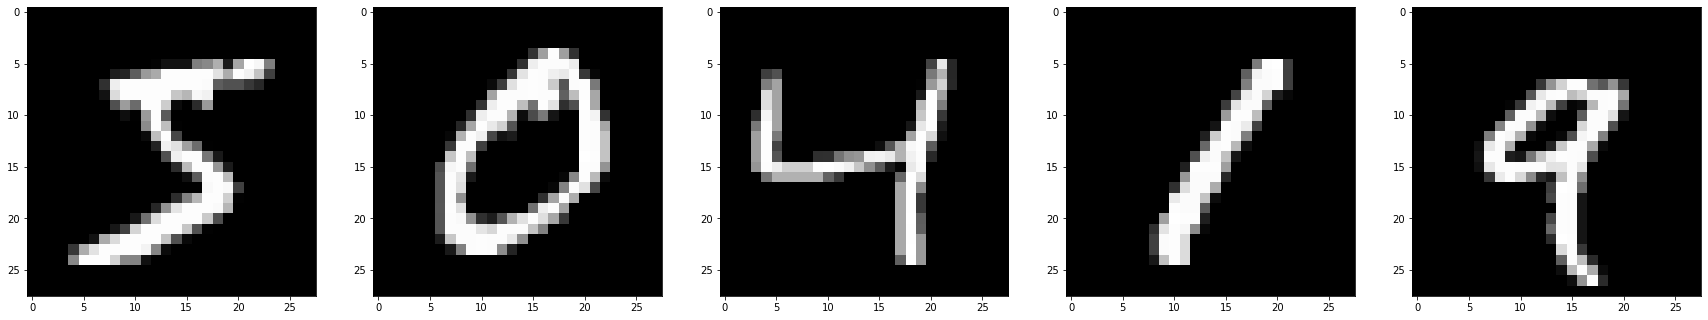

In [4]:
#print an example image
def print5(images):
    fig = plt.figure(figsize=(30,10))
    for i in range(5):
        fig.add_subplot(151+i)
        plt.imshow(images[i],cmap=plt.get_cmap('gray'));

print5(X_train)

Since this is a pre-loaded dataset, it is not surprising that the images are all in relatively good quality. No further preprocessing will need to be done.

In [5]:
img_height = 28
img_width = 28

#generate model
model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width)), #rescales pixel values from 0 - 1
    Flatten(), #reshapes image
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#compile model. use loss='categorical_crossentropy' because targets are already one-hot encoded (otherwise I would use 
#loss='sparse_categorical_crossentropy')
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit model
model.fit(x=X_train, y=y_train, batch_size=10, epochs=3, validation_split = .2, verbose=2);


Epoch 1/3
4800/4800 - 8s - loss: 0.2755 - accuracy: 0.9201 - val_loss: 0.1614 - val_accuracy: 0.9515 - 8s/epoch - 2ms/step
Epoch 2/3
4800/4800 - 6s - loss: 0.1330 - accuracy: 0.9604 - val_loss: 0.1261 - val_accuracy: 0.9647 - 6s/epoch - 1ms/step
Epoch 3/3
4800/4800 - 6s - loss: 0.0963 - accuracy: 0.9705 - val_loss: 0.1193 - val_accuracy: 0.9643 - 6s/epoch - 1ms/step


In [6]:
#evaluate accuracy
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9666
Accuracy: 0.9666000008583069
